1.preperation analysis


In [118]:
import numpy
import pandas
import numpy as np 
import pandas as pd
import os

In [119]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,RH,4.394449,9.360741,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,WD,Normal
1,3.044522,RL,4.406719,9.565775,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,WD,Normal
2,4.110874,RL,4.317488,9.534668,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,WD,Normal
3,4.110874,RL,4.369448,9.208238,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010,WD,Normal
4,4.795791,RL,3.784190,8.518392,Pave,IR1,HLS,AllPub,Inside,Gtl,...,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010,WD,Normal


In [120]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [121]:
# Glimpse the data set
print('The shape of data set : ', house_df.shape)
print('\nThe type of the feature values : ', house_df.dtypes.value_counts())

The shape of data set :  (1460, 81)

The type of the feature values :  object     43
int64      35
float64     3
dtype: int64


In [122]:
# check the nullity
# display data frame information 
house_df.info()

print("=== Null counts ===", house_df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
isnull_series = house_df.isnull().sum()

print('The list of column and count that existed null value : \n', isnull_series[isnull_series >0].sort_values(ascending=False))

The list of column and count that existed null value : 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [124]:
house_df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

2. Skewed Data Transformation
Logarithmic transformation is good for high variance type because log scale shinks the tick caps.

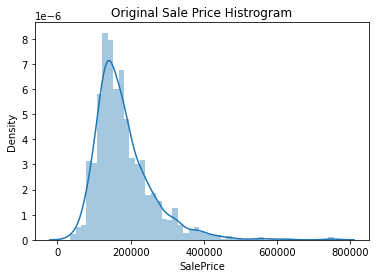

In [125]:
plt.title('Original Sale Price Histrogram')
sns.distplot(house_df['SalePrice'])

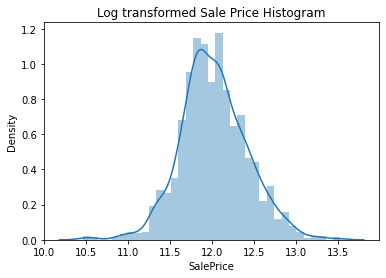

In [126]:
import numpy as np # linear algebra

plt.title('Log transformed Sale Price Histogram')
log_salePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_salePrice)

The application of the logarithmic transformation approximates the normal distribution.

Now we use the prepared data - a logarithmic transformation and find a void in the data for analysis.

1. Price data is converted using a logarithmic scale transformation.
2. Most of the missing columns are deleted.
3. Missing values are replaced by the average value.

In [127]:
import numpy as np # linear algebra

original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Drop null columns 
house_df.drop(['Id','PoolQC' ,'MiscFeature', 'Alley' ,'Fence' , 'FireplaceQu'], axis = 1, inplace = True)

# replace average values
house_df.fillna(house_df.mean(), inplace= True)

# check the null features - only object type remained.
null_column_counts = house_df.isnull().sum()[house_df.isnull().sum() > 0 ]
print('## Null feature type : \n', house_df.dtypes[null_column_counts.index])

## Null feature type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


3. Machine Learning  
Cast a object values to categorical values using a one-hot coding to train the data.Then check the shape of your transformated data.

In [128]:
print('The shape of data frame before applying the get_dummies function : ', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)


print('The shape of data frame after applying the get_dummies function :', house_df_ohe.shape)

null_column_counts = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0 ]
print('## Null feature type : \n', house_df_ohe.dtypes[null_column_counts.index])

The shape of data frame before applying the get_dummies function :  (1460, 75)
The shape of data frame after applying the get_dummies function : (1460, 271)
## Null feature type : 
 Series([], dtype: object)


Define a root mean squared error function to evaluate our regression model performance.  
I will use the rmse function for performance metrics.

In [129]:
from sklearn.metrics import mean_squared_error

def get_rmse(model) :
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__ , ' log scaling RMSE : ', np.round(rmse, 3))
    return rmse

def get_rmses(models) :
    rmses = [ ]
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    
    return rmses

First, we train the data using simple regression models - LinearRegression, Ridge, Lasso - without any hyperparameters adjustments.

> Блок с отступами

> Блок с отступами





In [130]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split


y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

# Linear Regression 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  log scaling RMSE :  0.132
Ridge  log scaling RMSE :  0.128
Lasso  log scaling RMSE :  0.176


[0.13189576579153628, 0.12750846334052995, 0.17628250556471403]

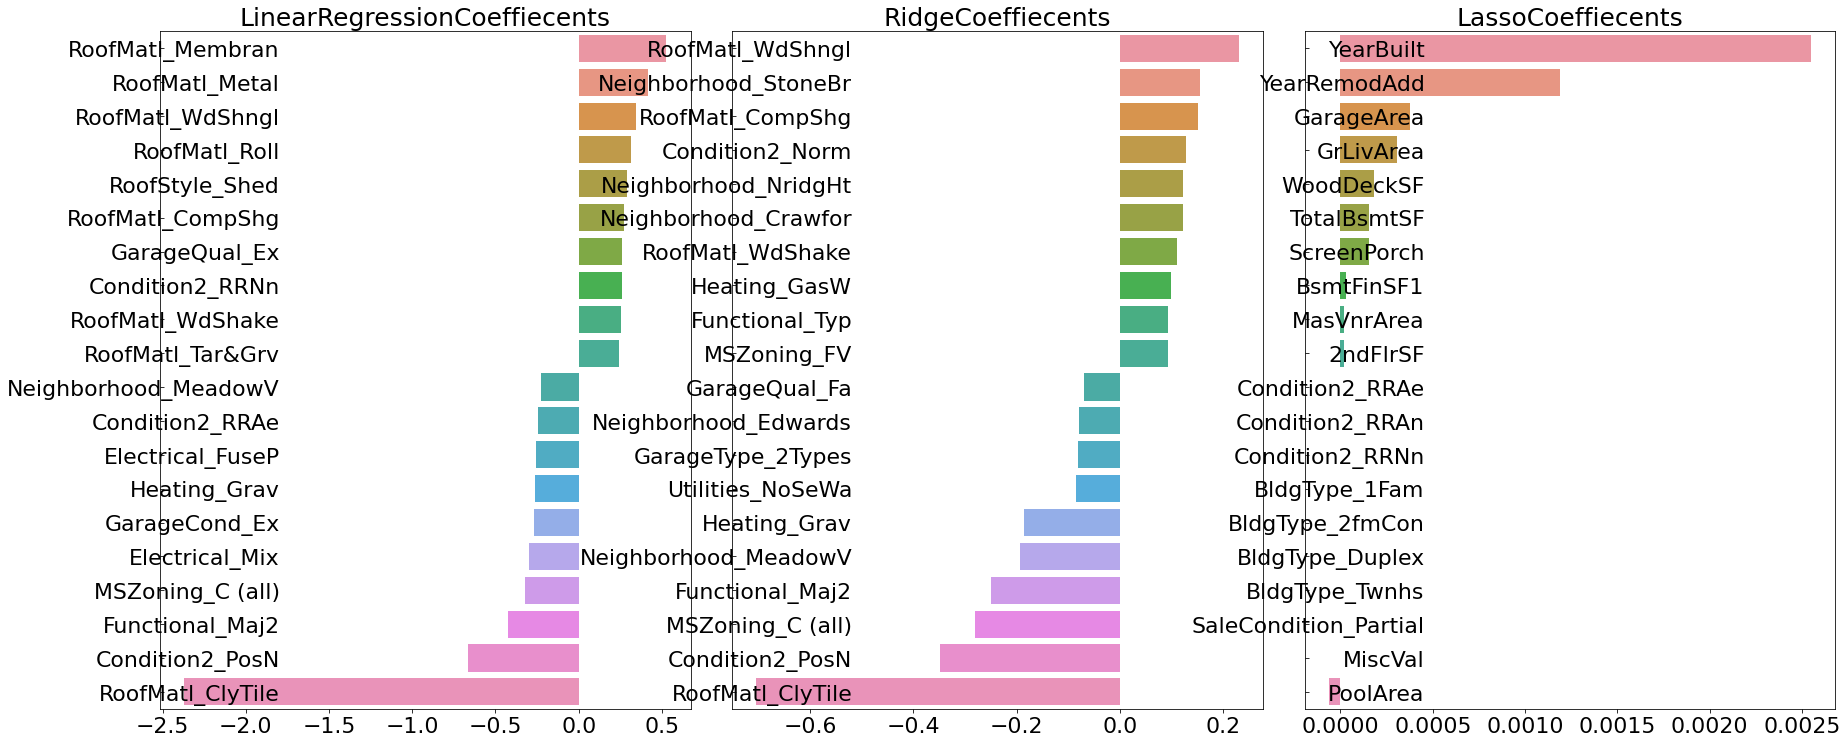

In [131]:
# define a function for display a coefficient graphs
def get_top_bottom_coef(model, n=10) :
    coef  = pd.Series(model.coef_, index = X_features.columns)
    
    coef_high = coef.sort_values(ascending =False).head(n)
    coef_low = coef.sort_values(ascending =False).tail(n)
    
    return coef_high, coef_low


def visualize_coefficient(models) :
    fig, axs = plt.subplots(figsize=(24,10), nrows =1, ncols =3)
    fig.tight_layout()
    
    for i_num , model in enumerate(models) :
        coef_high, coef_low = get_top_bottom_coef(model)
        
        coef_concat = pd.concat( [ coef_high, coef_low ])
        
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecents' , size=25)
        axs[i_num].tick_params(axis = "y", direction = "in", pad = -120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()) :
            label.set_fontsize(22)
            
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

When no adjustments are made, the rmse is as above.


 4Hyperparameters adjustments  
  
1. Cross-validation 
2. Grid search to find best regulation factors
3. Applying Transformation for specific skewed features

In [132]:
from sklearn.model_selection import cross_val_score

# define a cross validation score 
def  get_avg_rmse_cv(models) :
    
    for model in models :
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv = 5))
        
        rmse_avg = np.mean(rmse_list)
        print('\n {0} CV RMSE Array list : {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV Average RMSE value : {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))
                            
models = [lr_reg, ridge_reg, lasso_reg] 
get_avg_rmse_cv(models)
              


 LinearRegression CV RMSE Array list : [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV Average RMSE value : 0.155

 Ridge CV RMSE Array list : [0.117 0.154 0.142 0.117 0.189]
Ridge CV Average RMSE value : 0.144

 Lasso CV RMSE Array list : [0.161 0.204 0.177 0.181 0.265]
Lasso CV Average RMSE value : 0.198


In [133]:
from sklearn.model_selection import GridSearchCV

# Grid Search to find a best hyperparams
def find_best_params(model, params) :
    grid_model = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv=5) 
    
    grid_model.fit(X_features, y_target) 
    rmse = np.sqrt(-1 * grid_model.best_score_) 
    print('{0} 5 CV best parameter RMSE value : {1:.5f}, best alpha : {2}'.format(model.__class__.__name__, rmse, grid_model.best_params_))
    
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }

find_best_params(ridge_reg, ridge_params)
find_best_params(lasso_reg, lasso_params)

Ridge 5 CV best parameter RMSE value : 0.14177, best alpha : {'alpha': 12}
Lasso 5 CV best parameter RMSE value : 0.14198, best alpha : {'alpha': 0.001}


LinearRegression  log scaling RMSE :  0.132
Ridge  log scaling RMSE :  0.124
Lasso  log scaling RMSE :  0.12


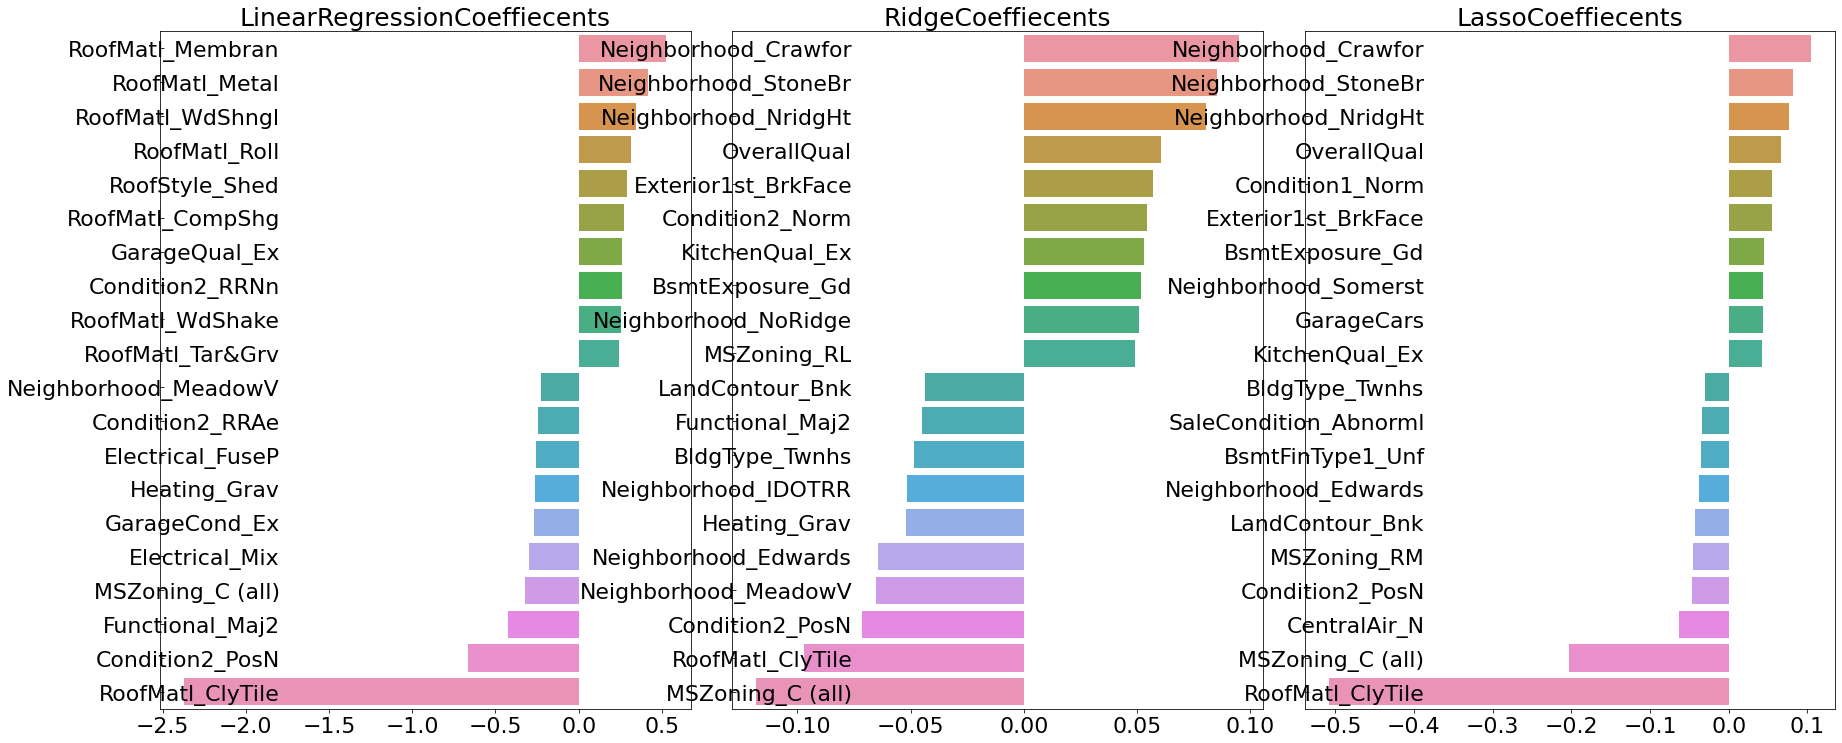

In [134]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_coefficient(models)

After the tuning you get better performance.  
 

| Adjustments | Linear | Ridge | Lasso |
|-------------|--------|-------|-------|
| No Adjust   |  0.132 | 0.128 | 0.176 |
| CV and GS   |  0.132 | 0.124 | 0.12  |  
  
Lasso shows the highest performance gain. (0.176 -> 0.12)

In [135]:
from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes !=  'object'].index
skew_features = house_df[features_index].apply(lambda x : skew(x))
skew_features_tops = skew_features[skew_features > 1]
print(skew_features_tops.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


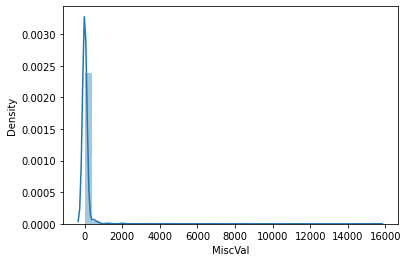

In [136]:
import seaborn as sns

#sns.scatterplot(house_df['MiscVal'], house_df['SalePrice'])
# graph the distribution plot - MiscVal is left-most leansing.
sns.distplot(house_df['MiscVal'])

Apply a logarithmic transformation to upgrade rmse values at the skewed score greater than 1.

In [137]:
house_df[skew_features_tops.index] = np.log1p(house_df[skew_features_tops.index])

Retrain after log transformation.

In [138]:
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

find_best_params(ridge_reg, ridge_params)
find_best_params(lasso_reg, lasso_params)

Ridge 5 CV best parameter RMSE value : 0.12755, best alpha : {'alpha': 10}
Lasso 5 CV best parameter RMSE value : 0.12522, best alpha : {'alpha': 0.001}


LinearRegression  log scaling RMSE :  0.128
Ridge  log scaling RMSE :  0.122
Lasso  log scaling RMSE :  0.119


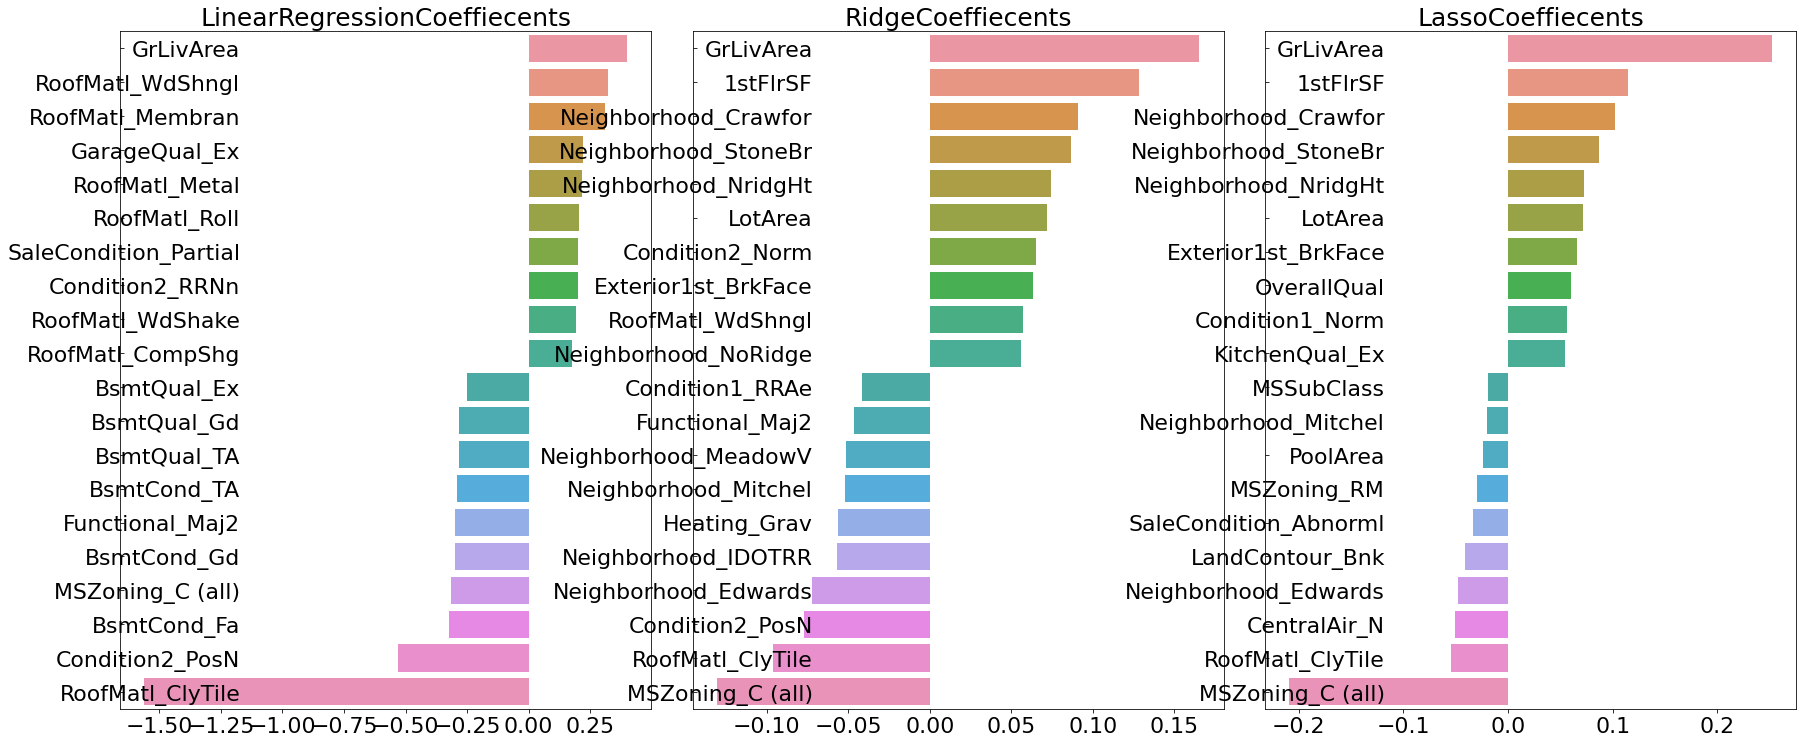

In [139]:
# training after feature adjustments and grid search model.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_coefficient(models)

Check the RMSE scores.
 

| Adjustments | Linear | Ridge | Lasso |
|-------------|--------|-------|-------|
| No Adjust   |  0.132 | 0.128 | 0.176 |
| CV and GS   |  0.132 | 0.124 | 0.12  |  
| Feature & GS|  0.128 | 0.122 | 0.119 |  
  
We get better.  

Outliers degrade performance.  
So we are removing some outlier features in 'GrLivArea'

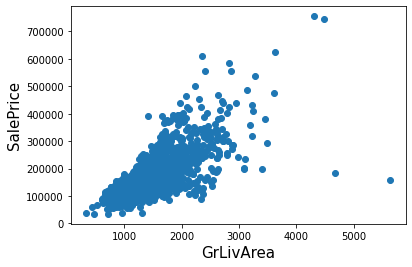

In [140]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)

plt.show()

In [141]:
# Remove outiler contents from specific column.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('Index of outiler recodes : ', outlier_index.values)
print('Shape of dataframe before removal : ', house_df_ohe.shape )

# Remove the outiler recode from dataframe
house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
print('Shape of dataframe after removal : ', house_df_ohe.shape )

Index of outiler recodes :  [ 523 1298]
Shape of dataframe before removal :  (1460, 271)
Shape of dataframe after removal :  (1458, 271)


In [142]:
# Find a best model after removing outlier.
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

find_best_params(ridge_reg, ridge_params)
find_best_params(lasso_reg, lasso_params)

Ridge 5 CV best parameter RMSE value : 0.11251, best alpha : {'alpha': 8}
Lasso 5 CV best parameter RMSE value : 0.11221, best alpha : {'alpha': 0.001}


LinearRegression  log scaling RMSE :  0.129
Ridge  log scaling RMSE :  0.103
Lasso  log scaling RMSE :  0.1


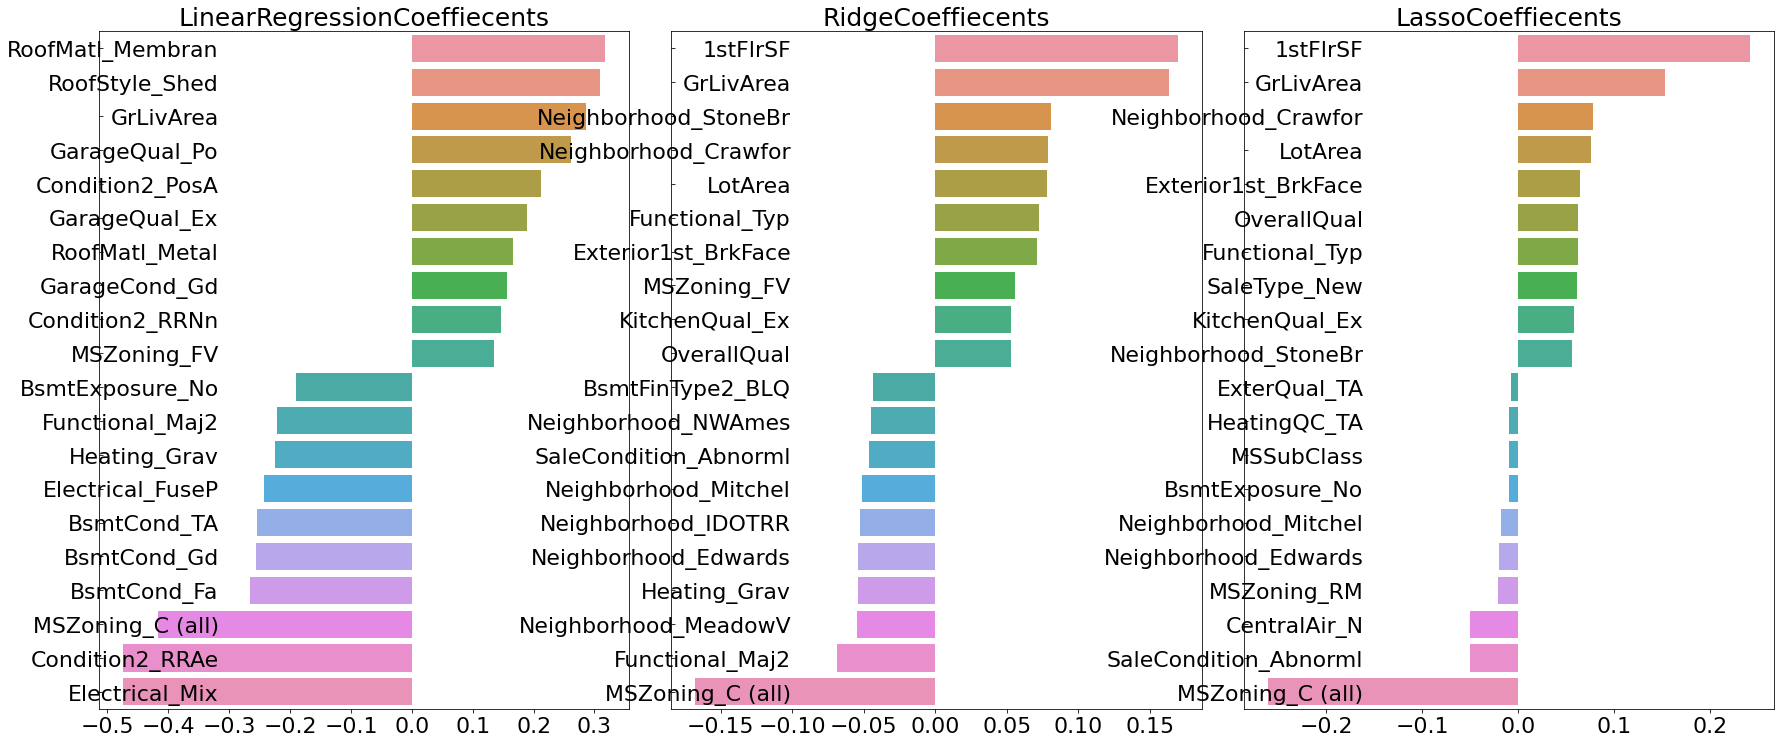

In [143]:
# Retrain using best parameters after remove.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_coefficient(models)

 Adjustments    | Linear | Ridge | Lasso |
|----------------|--------|-------|-------|
| No Adjust      |  0.132 | 0.128 | 0.176 |
| CV and GS      |  0.132 | 0.124 | 0.12  |  
| Feature & GS   |  0.128 | 0.122 | 0.119 |  
| Remove Outlier |  0.129 | 0.103 | 0.1   |

Now, we can the best performance after above modifications - especially Lasso regulation.

XGBooster regression model and light grident boost model case attached below for reference.

In [144]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample=0.8)
find_best_params(xgb_reg, xgb_params)

[16:00:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV best parameter RMSE value : 0.11499, best alpha : {'n_estimators': 1000}


LinearRegression  log scaling RMSE :  0.129
Ridge  log scaling RMSE :  0.103
Lasso  log scaling RMSE :  0.1


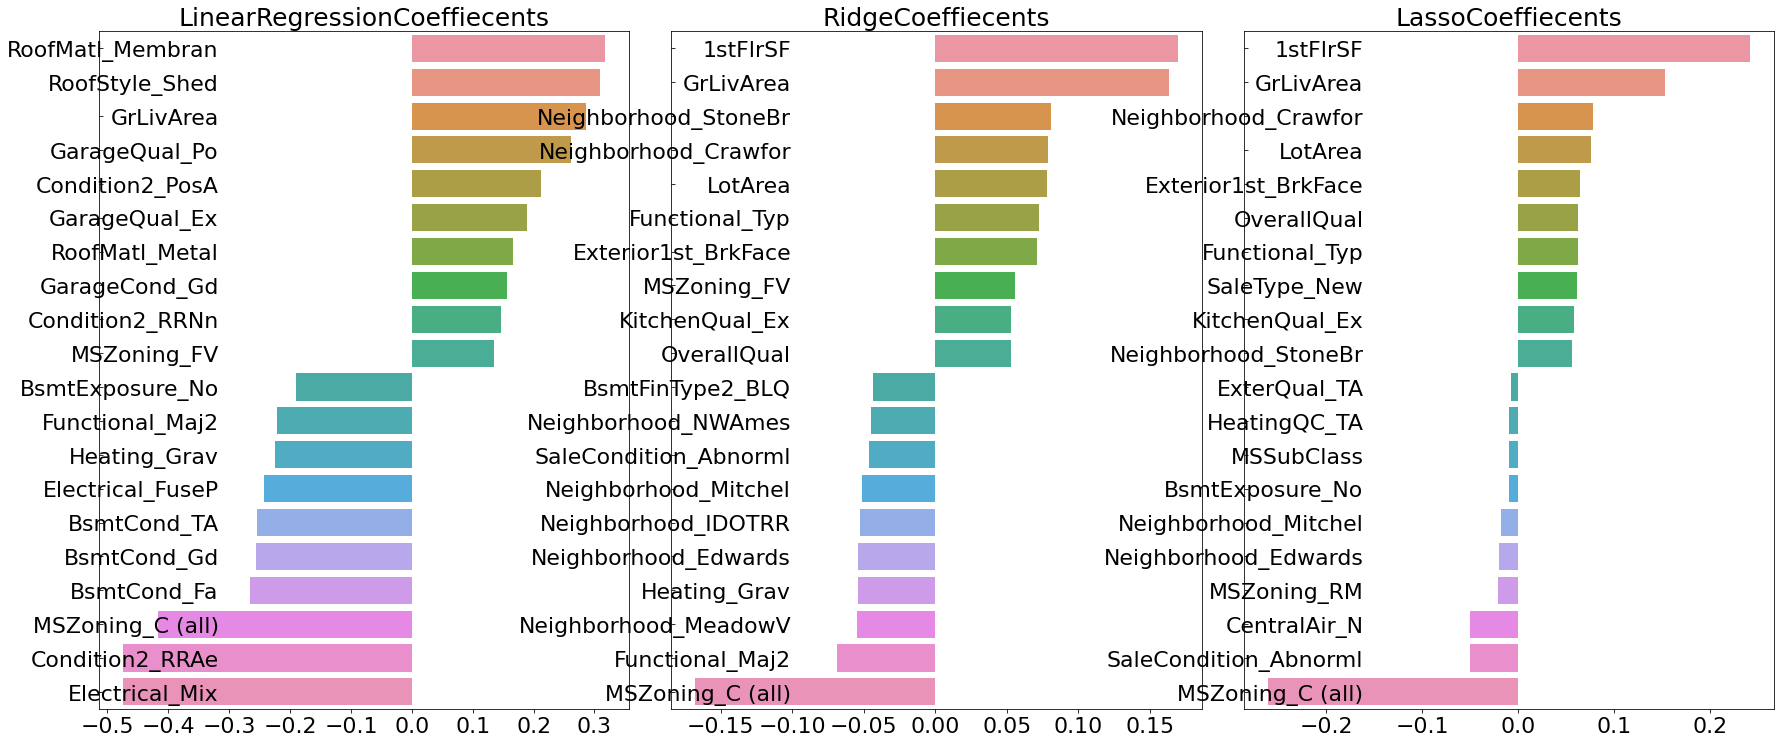

In [145]:
# Retrain using best parameters after remove.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_coefficient(models)

| Adjustments    | Linear | Ridge | Lasso |
|----------------|--------|-------|-------|
| No Adjust      |  0.132 | 0.128 | 0.176 |
| CV and GS      |  0.132 | 0.124 | 0.12  |  
| Feature & GS   |  0.128 | 0.122 | 0.119 |  
| Remove Outlier |  0.129 | 0.103 | 0.1   |

Now, we can the best performance after above modifications - especially Lasso regulation.

In [146]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample=0.8)
find_best_params(xgb_reg, xgb_params)

[16:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV best parameter RMSE value : 0.11499, best alpha : {'n_estimators': 1000}


In [147]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' : [1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample = 0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)

find_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV best parameter RMSE value : 0.11613, best alpha : {'n_estimators': 1000}


In [148]:
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

[16:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6)

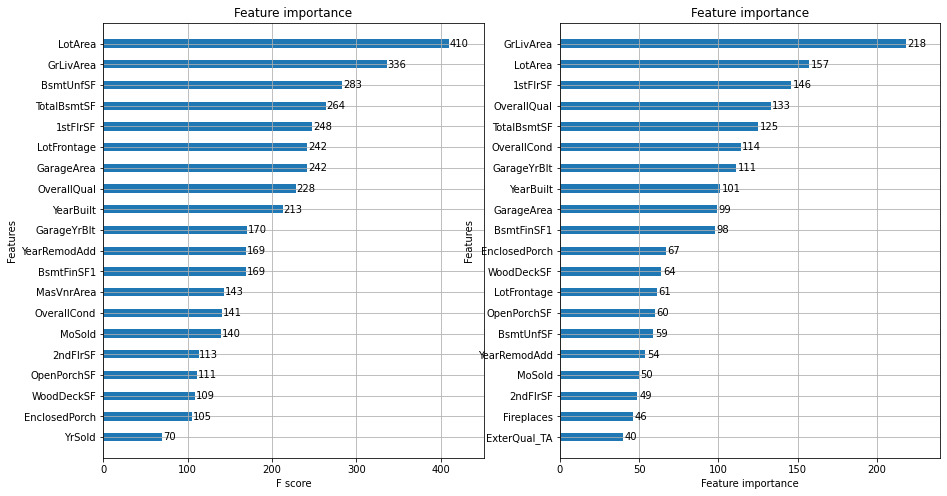

In [149]:
import xgboost 
import lightgbm

fig, ax = plt.subplots(1, 2, figsize=(15,8))
xgboost.plot_importance(xgb_reg, ax=ax[0], max_num_features=20, height=0.4)
lightgbm.plot_importance(lgbm_reg, ax=ax[1], max_num_features=20, height=0.4)

Stacking Ensemble Model Practices  
  
1. Simple ensemble voting model for weigth (soft voting model).  
2. KFold stacked Ensemble model  

First, an example of mixed soft voting model.

Two trained model - rigde, lasso - have different accuracy.  
In this case, Lasso is more accurate than ridge, we will give more weight to lasso. ( 4 : 6 ratio )  
Mixed model perform better than single trained model.

In [150]:
# mixed soft voting model with different weights.
def get_rmse_pred(preds) :
    for key in preds.keys() :
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} model RMSE : {1}'.format(key, rmse))
        
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred

preds = { 'mixed result' : pred ,
          'Ridge' : ridge_pred,
          'Lasso' : lasso_pred }

get_rmse_pred(preds)

mixed result model RMSE : 0.10007930884470513
Ridge model RMSE : 0.10345177546603244
Lasso model RMSE : 0.10024170460890035


In [151]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Stacking ensemble model with kfolds.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds) :
    kf = KFold(n_splits = n_folds, shuffle = False ) 
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    
    print(model.__class__.__name__, ' model start ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)) :
        print('\t Fold set : ' , folder_counter, ' Start ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        
        # stacking train predictions for meta-model - training data
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # stacking test predictions for meta-model at each steps full prediction.
        test_pred[:, folder_counter] = model.predict(X_test_n)
     
    # averging test predicition for meta-model - test data
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [152]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test     = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test   = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model start 
	 Fold set :  0  Start 
	 Fold set :  1  Start 
	 Fold set :  2  Start 
	 Fold set :  3  Start 
	 Fold set :  4  Start 
Lasso  model start 
	 Fold set :  0  Start 
	 Fold set :  1  Start 
	 Fold set :  2  Start 
	 Fold set :  3  Start 
	 Fold set :  4  Start 
XGBRegressor  model start 
	 Fold set :  0  Start 
[16:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  1  Start 
[16:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  2  Start 
[16:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  3  Start 
[16:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  4  Start 
[16:01:52] WARNING: /workspace/src/objective/regression_obj.cu:15

In [153]:
# final meta-model stacking
stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis = 1)
stack_final_X_test  = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis = 1)

# give a regulation
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train, y_train)
final = meta_model_lasso.predict(stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('Stacking regression model final rmse : ', rmse)

Stacking regression model final rmse :  0.09738961783055025


Final.  
We will use a stacking ensemble technique for prediction.

In [154]:
# Prepare for submission 
test_df = pd.read_csv('test.csv')

# Drop null columns 
test_df.drop(['Id','PoolQC' ,'MiscFeature', 'Alley' ,'Fence' , 'FireplaceQu'], axis = 1, inplace = True)

# replace average values
test_df.fillna(house_df.mean(), inplace= True)

print('Check the nullity :', np.sum(test_df.isna().sum()))

na_col = test_df.isna().sum()
na_col.sort_values(ascending = False)

Check the nullity : 555


GarageQual       78
GarageCond       78
GarageFinish     78
GarageType       76
BsmtCond         45
                 ..
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 74, dtype: int64

In [155]:
# Fill na value with most frequently occuring values
test_df.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))

MSSubClass       None
MSZoning         None
LotFrontage      None
LotArea          None
Street           None
                 ... 
MiscVal          None
MoSold           None
YrSold           None
SaleType         None
SaleCondition    None
Length: 74, dtype: object

In [156]:
print('Check the nullity :', np.sum(test_df.isna().sum()))

Check the nullity : 0


In [157]:
test_df[skew_features_tops.index] = np.log1p(test_df[skew_features_tops.index])

test_df_ohe = pd.get_dummies(test_df)


print('The shape of prepared submission test set : ',test_df_ohe.shape)
print('The shape of train model : ',X_train.shape)

The shape of prepared submission test set :  (1459, 254)
The shape of train model :  (1166, 270)


In [158]:
train_cols = list(X_train.columns)
test_cols = list(test_df_ohe.columns)

In [159]:
print('Missing column from train to test ',list(set(train_cols) - set(test_cols)))
print('Missing column from test to train ',list(set(test_cols) - set(train_cols)))

Missing column from train to test  ['Utilities_NoSeWa', 'Condition2_RRAe', 'Exterior1st_ImStucc', 'Condition2_RRAn', 'Condition2_RRNn', 'Heating_Floor', 'HouseStyle_2.5Fin', 'GarageQual_Ex', 'RoofMatl_ClyTile', 'Heating_OthW', 'Exterior2nd_Other', 'RoofMatl_Roll', 'Exterior1st_Stone', 'RoofMatl_Membran', 'RoofMatl_Metal', 'Electrical_Mix']
Missing column from test to train  []


In this case, all of test columns are included in the train dataset.  
We can use a left join with two sets.

In [160]:
final_test_df = pd.DataFrame(data = None, columns = train_cols)
final_test_df = final_test_df.append(test_df_ohe)

In [161]:
final_test_df.shape

(1459, 270)

In [162]:
np.sum(final_test_df[['RoofMatl_ClyTile', 'Exterior1st_ImStucc', 'Heating_Floor', 'Heating_OthW', 'Exterior2nd_Other', 'RoofMatl_Metal', 'Condition2_RRAn', 'RoofMatl_Membran', 'HouseStyle_2.5Fin', 'Condition2_RRAe', 'GarageQual_Ex', 'Condition2_RRNn', 'Exterior1st_Stone', 'Electrical_Mix', 'Utilities_NoSeWa', 'RoofMatl_Roll']])

RoofMatl_ClyTile       0
Exterior1st_ImStucc    0
Heating_Floor          0
Heating_OthW           0
Exterior2nd_Other      0
RoofMatl_Metal         0
Condition2_RRAn        0
RoofMatl_Membran       0
HouseStyle_2.5Fin      0
Condition2_RRAe        0
GarageQual_Ex          0
Condition2_RRNn        0
Exterior1st_Stone      0
Electrical_Mix         0
Utilities_NoSeWa       0
RoofMatl_Roll          0
dtype: object

In [163]:
final_test_df.values.shape

(1459, 270)

In [164]:
final_test_df.fillna(0, inplace = True)
test_cols = final_test_df.isna().sum()
print(test_cols.sort_values(ascending = False))

MSSubClass               0
BsmtCond_Gd              0
ExterCond_Gd             0
ExterCond_Po             0
ExterCond_TA             0
                        ..
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
SaleCondition_Partial    0
Length: 270, dtype: int64


In [165]:
X_train_n = X_train.values
y_train_n = y_train.values
X_final_test_n = final_test_df.values


ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_final_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_final_test_n, 5)
xgb_train, xgb_test     = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_final_test_n, 5)
lgbm_train, lgbm_test   = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_final_test_n, 5)

Ridge  model start 
	 Fold set :  0  Start 
	 Fold set :  1  Start 
	 Fold set :  2  Start 
	 Fold set :  3  Start 
	 Fold set :  4  Start 
Lasso  model start 
	 Fold set :  0  Start 
	 Fold set :  1  Start 
	 Fold set :  2  Start 
	 Fold set :  3  Start 
	 Fold set :  4  Start 
XGBRegressor  model start 
	 Fold set :  0  Start 
[16:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  1  Start 
[16:02:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  2  Start 
[16:02:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  3  Start 
[16:02:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 Fold set :  4  Start 
[16:02:15] WARNING: /workspace/src/objective/regression_obj.cu:15

In [166]:
# final meta-model stacking
stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis = 1)
stack_final_X_test  = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis = 1)

# give a regulation
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train, y_train)
final_sub = meta_model_lasso.predict(stack_final_X_test)

In [167]:
final_sub_in = np.expm1(final_sub)

In [168]:
# submission
submission = pd.read_csv("sample_submission.csv")

In [169]:
submission.iloc[:,1] = final_sub_in

In [170]:
submission.to_csv("submission.csv", index=False)